<a href="https://colab.research.google.com/github/yankikalfa/SAIS-ML-for-Finance/blob/main/LinearML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 2: Linear Machine Learning Models

## Objectives
* Dowload Goyal Welch Data
* Calculate Excess Returns
* ARMAx Models
* Loss Functions
* Linear ML models
  * Recursive Forecasting

## Libraries

In [ ]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install statsmodels -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore")
plt.style.use('bmh')

## Data

We are going to be using the dataset collected by Goyal and Welch. Please make sure that you upload the dataset to your colab.

In [ ]:
df=pd.read_csv('GWdata.csv')
df['yyyymm'] = pd.to_datetime(df['yyyymm'],format='%Y%m', errors='coerce')
df.set_index('yyyymm',inplace=True)

In [ ]:
df.head()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,CRSP_SPvw
yyyymm,,,,,,,,,,,,,,,
1926-12-01,13.49,0.6900,1.240,0.441476,0.0307,0.0468,0.0568,0.0354,0.050876,0.0028,0.000000,0.0078,0.0056,0.000465,0.026047
1927-01-01,13.21,0.6967,1.229,0.443706,0.0323,0.0466,0.0561,0.0351,0.050824,0.0025,-0.011299,0.0075,0.0056,0.000470,-0.002910
1927-02-01,13.84,0.7033,1.218,0.428501,0.0329,0.0467,0.0559,0.0347,0.051668,0.0026,-0.005714,0.0088,0.0069,0.000287,0.045522
1927-03-01,13.93,0.7100,1.208,0.469765,0.0320,0.0462,0.0554,0.0331,0.046357,0.0030,-0.005747,0.0253,0.0083,0.000924,0.007324
1927-04-01,14.17,0.7167,1.197,0.456754,0.0339,0.0458,0.0548,0.0333,0.050514,0.0025,0.000000,-0.0005,0.0055,0.000603,0.013021


In [ ]:
df['er'] = df['CRSP_SPvw'] - df['Rfree']

In [ ]:
df.drop(['CRSP_SPvw','Rfree','Index'],axis=1,inplace=True)

In [ ]:
Y = df.loc['1927-01-01':,'er'].reset_index(drop=True)
X = df.loc[:'2021-11-01', df.columns!='er'].reset_index(drop=True)

In [ ]:
Y

0      -0.005410
1       0.042922
2       0.004324
3       0.010521
4       0.059353
          ...   
1135    0.030600
1136   -0.046076
1137    0.070510
1138   -0.007356
1139    0.043485
Name: er, Length: 1140, dtype: float64

In [ ]:
def timeseries_prediction(input_data, to_predict, cv_model, cc,p,q):
    """
    parameters:
    -----------
    input_data = data_frame of all input variables(X) to build the model
    to_predict = pandas series of output variables to build the model
    cc = Start Index
    p = AR order
    q = MA order 
  
    
    returns:
    --------
    predicted_values = The predicted values over time by each model
    """
       
    start = cc
    x_new = input_data.loc[:start-1,]
    y_new = to_predict[:start]
    
    predicted_values = []

    
    for i in range(start,len(input_data)):
        if cv_model =='I(0)':
            model = pm.ARIMA(order=(p,0,q))
            results = model.fit(y_new,exog=x_new)
        elif cv_model =='I(1)':
              model = pm.ARIMA(order=(p,1,q))
              results = model.fit(y_new,x_new)

        
        prediction_test = results.predict(n_periods=1,exog=input_data.loc[i])
        
        
        x_new = x_new.append(pd.DataFrame(input_data.loc[start]))
        y_new = y_new.append(pd.Series(to_predict[start]))
        start += 1
        predicted_values.append(prediction_test[0])
    
  
    return predicted_values

    


In [ ]:
arimax_forecast=timeseries_prediction(X,Y,'I(0)',500,p=1,q=1)

##  Loss Functions

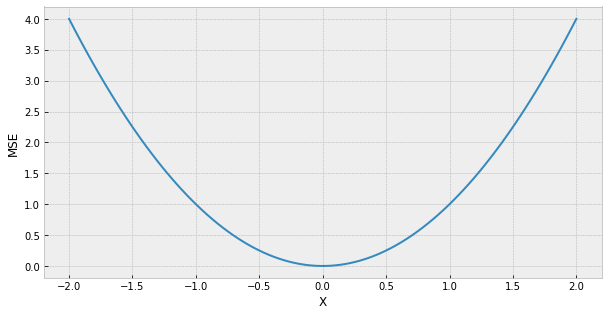

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
# Creating vectors X and Y
x = np.linspace(-2, 2, 100)
y = x ** 2
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('MSE')

# Show the plot
plt.show()

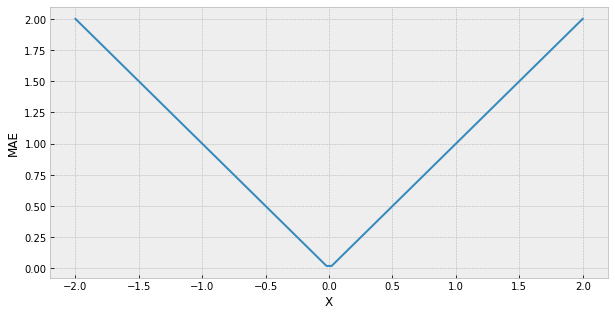

In [ ]:
x = np.linspace(-2, 2, 100)
y = np.abs(x)
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('MAE')
 
# Show the plot
plt.show()

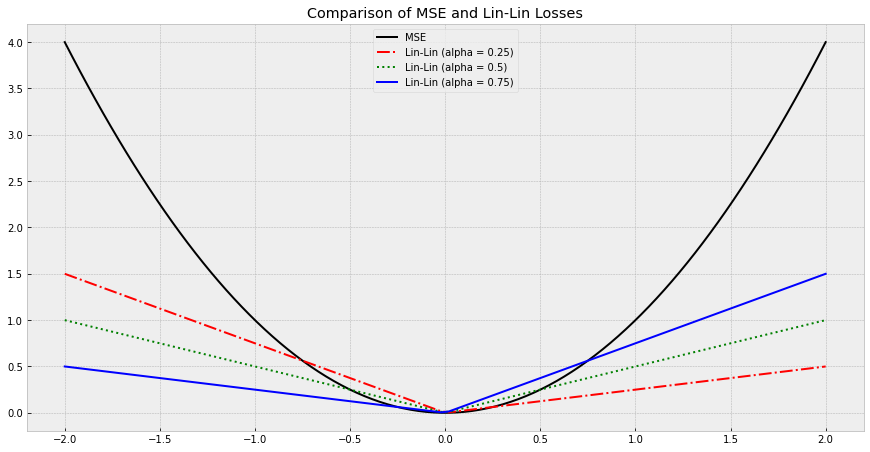

In [ ]:
x = np.linspace(-2, 2, 100)
y_25 = np.piecewise(x,[x<=0,x>0] , [lambda x: (-(0.75))*x, lambda x: 0.25*x ])
y_5 = np.piecewise(x,[x<=0,x>0] , [lambda x: (-(0.5))*x, lambda x: 0.5*x ])
y_75 = np.piecewise(x,[x<=0,x>0] , [lambda x: (-(0.25))*x, lambda x: 0.75*x ])
y_mse = x ** 2

fig = plt.figure(figsize = (15, 7.5))
plt.plot(x, y_mse, 'k', label ='MSE') 
plt.plot(x, y_25, 'r-.', label ='Lin-Lin (alpha = 0.25)')
plt.plot(x, y_5, 'g:', label ='Lin-Lin (alpha = 0.5)')
plt.plot(x, y_75, 'b', label ='Lin-Lin (alpha = 0.75)')
 
# Add features to our figure
plt.legend()
plt.title('Comparison of MSE and Lin-Lin Losses')
# Show plot
plt.show()


## Linear Machine Learning Models

We will use the same data and use LASSO, and Ridge to forecast Excess Returns.

When we use LASSO, Ridge or Elastic Net, we need the variables to be around the same scale. We can accomplish that either by normalizing the variables with their mean and variance or we can rank them. Ranking is much more robust to outliers because there is a hard threshold.

**Objectives**
* Introduce scaling
* Introduce forecasting with LASSO and Ridge
* Recursive forecasts and scaling

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet



https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html



https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
X

,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,infl,ltr,corpr,svar
0,0.6900,1.2400,0.441476,0.0307,0.0468,0.0568,0.0354,0.050876,0.000000,0.0078,0.0056,0.000465
1,0.6967,1.2290,0.443706,0.0323,0.0466,0.0561,0.0351,0.050824,-0.011299,0.0075,0.0056,0.000470
2,0.7033,1.2180,0.428501,0.0329,0.0467,0.0559,0.0347,0.051668,-0.005714,0.0088,0.0069,0.000287
3,0.7100,1.2080,0.469765,0.0320,0.0462,0.0554,0.0331,0.046357,-0.005747,0.0253,0.0083,0.000924
4,0.7167,1.1970,0.456754,0.0339,0.0458,0.0548,0.0333,0.050514,0.000000,-0.0005,0.0055,0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...
1135,58.3282,164.2967,0.187005,0.0005,0.0257,0.0324,0.0132,0.016079,0.004811,0.0305,0.0239,0.001124
1136,58.7913,169.8333,0.184756,0.0005,0.0255,0.0324,0.0128,0.014846,0.002066,-0.0035,-0.0045,0.000602
1137,59.2545,175.3700,0.193036,0.0004,0.0253,0.0323,0.0137,0.015598,0.002716,-0.0250,-0.0194,0.001393
1138,59.6354,182.8600,0.182389,0.0005,0.0268,0.0335,0.0158,0.013368,0.008308,0.0051,0.0159,0.001151


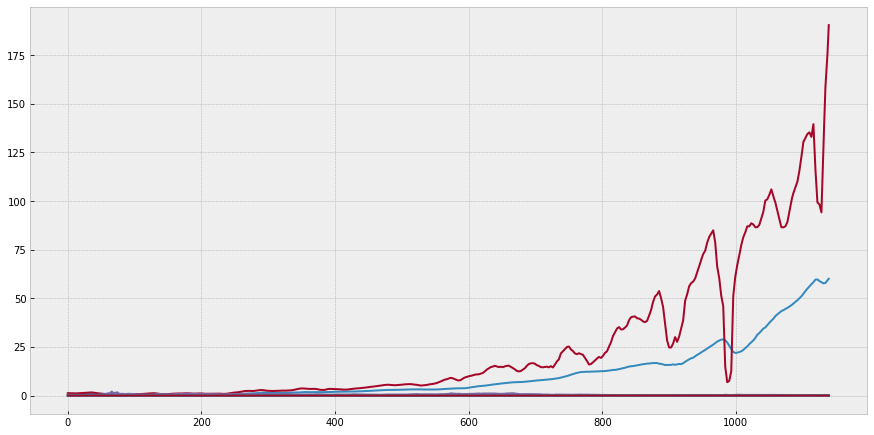

In [ ]:
fig = plt.figure(figsize = (15, 7.5))
plt.plot(X)

In [ ]:
X_scaled=pd.DataFrame(MinMaxScaler(feature_range=(-1,1)).fit_transform(X))

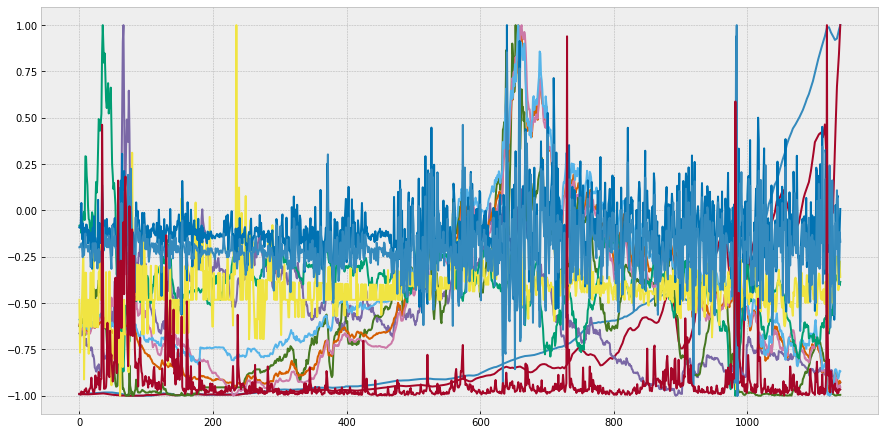

In [ ]:
X_scaled.columns=X.columns
fig = plt.figure(figsize = (15, 7.5))
plt.plot(X_scaled)

### Ridge Regression

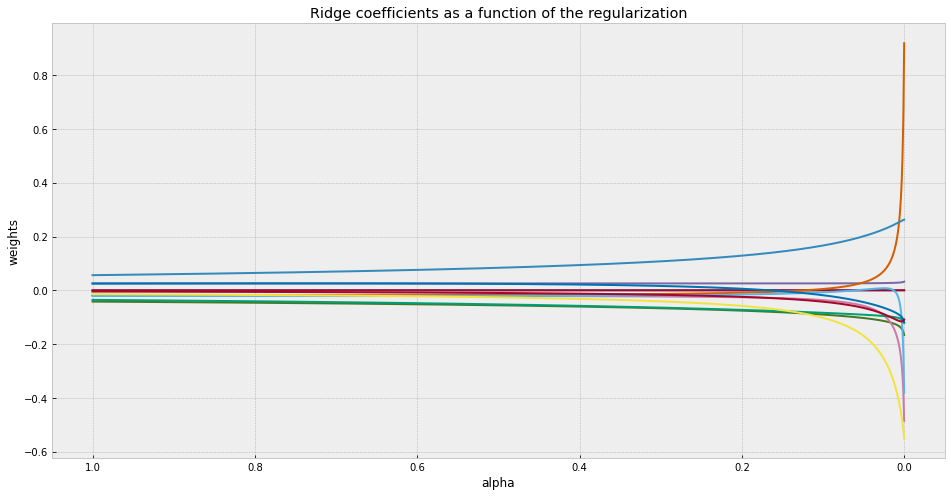

In [ ]:
plt.rcParams["figure.figsize"] = (16,8)
n_alphas = 1000
alphas = np.linspace(0, 1, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
  
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

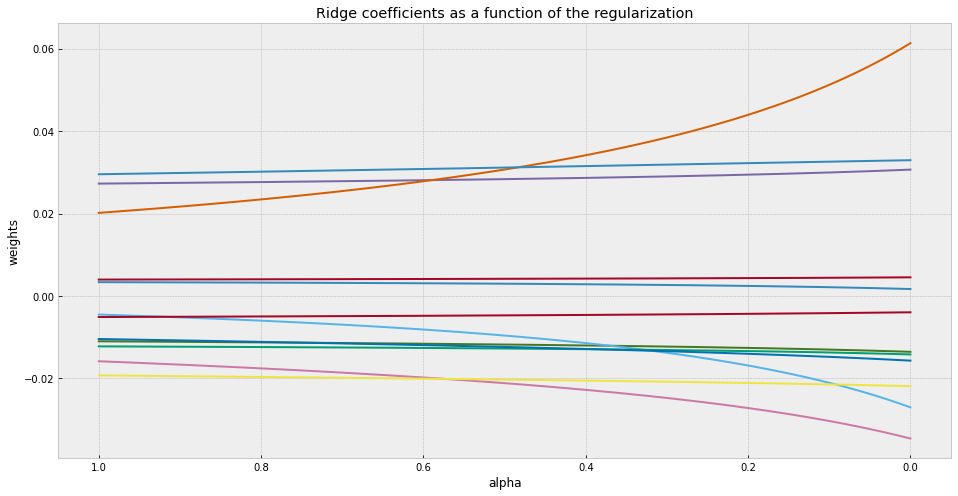

In [ ]:
plt.rcParams["figure.figsize"] = (16,8)
n_alphas = 1000
alphas = np.linspace(0, 1, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X_scaled, Y)
    coefs.append(ridge.coef_)
  
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

Machine Learning algortihms work by splitting a sample into three Training, Validation, and Test. For now, we will ignore the validation set. This is because we are not tuning any hyperparameters yet.

In [ ]:
scaler=MinMaxScaler(feature_range=(-1,1))

In [ ]:
X_train =pd.DataFrame(scaler.fit_transform(X.loc[:1000-1]))
X_test=pd.DataFrame(scaler.transform(X.loc[1000:]))

In [ ]:
y_train = Y[:1000]
y_test=Y[1000:]

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.510805,0.432245,-0.726025,-0.982812,-0.568688,-0.532303,-0.575385,-0.293164,-0.378763,-0.285984,-0.207652,-0.984149
1,0.513923,0.480918,-0.731551,-0.981584,-0.565618,-0.535112,-0.607692,-0.290923,-0.438468,0.078957,0.041052,-0.951403
2,0.517048,0.529589,-0.697592,-0.981584,-0.616270,-0.563202,-0.653846,-0.298919,-0.462700,0.179448,-0.284177,-0.773226
3,0.520166,0.578262,-0.681686,-0.986495,-0.628550,-0.537921,-0.701538,-0.358524,-0.506833,0.186249,0.170187,-0.844228
4,0.527578,0.615812,-0.711082,-0.981584,-0.653108,-0.568820,-0.700000,-0.386156,-0.476916,-0.132603,-0.108011,-0.907523
...,...,...,...,...,...,...,...,...,...,...,...,...
136,3.074625,2.878484,-0.930298,-0.995089,-0.983116,-0.957865,-1.076923,-0.381673,-0.361018,0.079713,-0.053009,-0.970305
137,3.107222,3.009511,-0.932655,-0.995089,-0.986186,-0.957865,-1.083077,-0.392260,-0.430177,-0.177182,-0.279394,-0.985033
138,3.139825,3.140541,-0.923975,-0.996317,-0.989256,-0.959270,-1.069231,-0.385803,-0.413797,-0.339630,-0.398167,-0.962701
139,3.166636,3.317796,-0.935136,-0.995089,-0.966232,-0.942416,-1.036923,-0.404943,-0.272886,-0.112202,-0.116780,-0.969539


In [ ]:
model = Ridge()
fit = model.fit(X_train,y_train)
ridge_predict=pd.Series(fit.predict(X_test)).rename('Ridge')

In [ ]:
df = pd.concat([y_test.reset_index(drop=True),ridge_predict],axis=1)

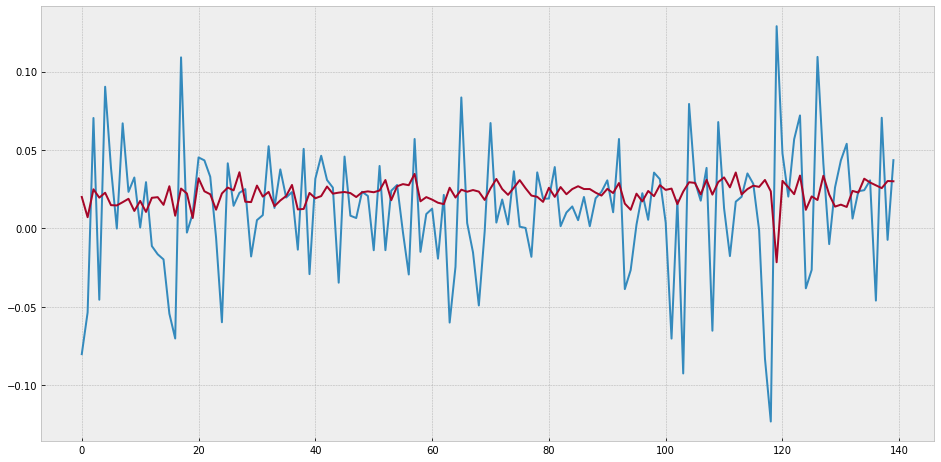

In [ ]:
plt.plot(df)

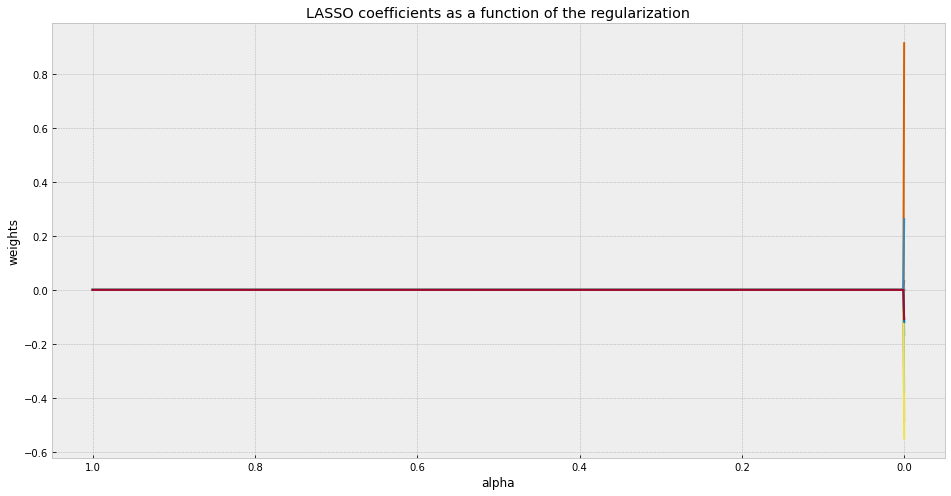

In [ ]:
plt.rcParams["figure.figsize"] = (16,8)
n_alphas = 1000
alphas = np.linspace(0, 1, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)
  
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("LASSO coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

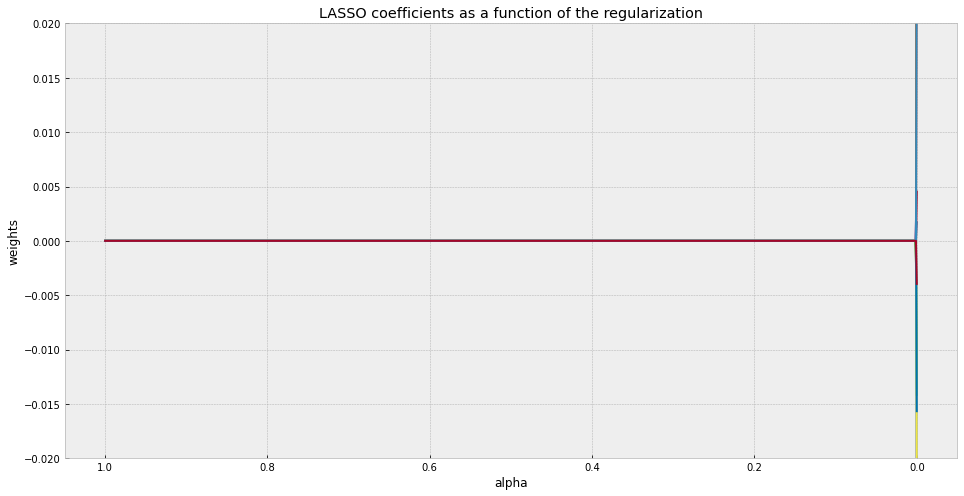

In [ ]:
plt.rcParams["figure.figsize"] = (16,8)
n_alphas = 1000
alphas = np.linspace(0, 1, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X_scaled, Y)
    coefs.append(lasso.coef_)
  
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("LASSO coefficients as a function of the regularization")
plt.axis("tight")
plt.ylim(-0.02,0.02)
plt.show()

In [ ]:
model = Lasso()
fit = model.fit(X_train,y_train)
lasso_predict=pd.Series(fit.predict(X_test)).rename('Lasso')

In [ ]:
df= pd.concat([df,lasso_predict],axis=1)

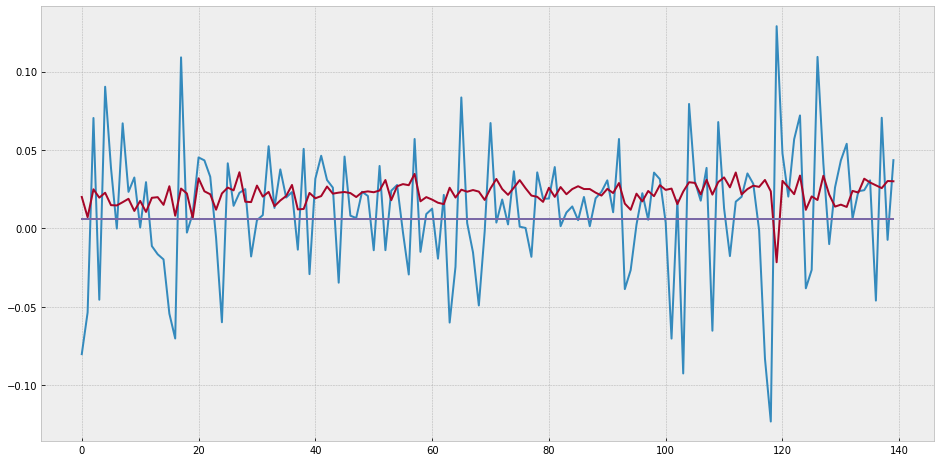

In [ ]:
plt.plot(df)

We can see immediately that LASSO penalty is much harsher. The model pretty much picks nothing. We assumed that relative weights in the Ridge and LASSO remained constant during the forecasting period. This generally not the case. 
To account for this, we need to think of recursive forecasts.

Furthermore, another potential pitfall is scaling, we assumed that relationships within the feature space remained the same. This is not the case in real time. We would definitely update the scales of the variables with new data.

In the following section we are going to write a function that does recursive forecasts and scales everything automatically.



In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
def timeseries_prediction_lasso(input_data, to_predict, cv_model, cc):
    """
    parameters:
    -----------
    input_data = data_frame of all input variables(X) to build the model
    to_predict = pandas series of output variables to build the model 
    cv = number of cross validation splits
    val_size = number of validation samples to predict on after each cross validation step
    start = initial number of input variables to consider
    alpha = regularizer value for model
    max_iter = maximum iterations to run while running the model
    
    returns:
    --------
    rmse_train = Return the train rmse of all the models
    rmse_test = Return the validation rmse of all the models
    r_squared = Return the r squared value of train set of all the models
    predicted_values = The predicted values over time by each model
    """
    scalerst =MinMaxScaler(feature_range=(-1,1))       
    start = cc
    x_new = input_data.loc[:start-1,]
    y_new = to_predict[:start]
    
    predicted_values = []
    

    rmse_train = []
    rmse_test = []
    r_squared = []
    coef=[]
    
    for i in range(start,len(input_data)):
        x_new_tr=pd.DataFrame(scalerst.fit_transform(x_new))
        if cv_model =='Lasso':
            model = Lasso()
            results = model.fit(x_new_tr,y_new)
        elif cv_model =='Ridge':
            model = Ridge()
            results = model.fit(x_new_tr,y_new)
        else:
            raise Exception("Please input the cross validation model as Lasso or Ridge ")
        
        
        coef.append(results.coef_)
        prediction_train = results.predict(x_new_tr)
    
        prediction_test = results.predict(scalerst.transform(pd.DataFrame(input_data.loc[i]).T))
        
        r_squared.append(r2_score(y_new, prediction_train))
        rmse_train.append(mean_squared_error(y_new, prediction_train))
        
        start = i
        x_new = x_new.append(pd.DataFrame(input_data.loc[start]).T)
        y_new = y_new.append(pd.Series(to_predict[start]))
        predicted_values.append(prediction_test[0])
    
    rmse_test.append(mean_squared_error(to_predict[cc:], predicted_values))
    



    return rmse_train, rmse_test, r_squared, predicted_values, coef

In [ ]:
lasso_mse_train, lasso_mse_test, lasso_r2, lasso_forecast,coef = timeseries_prediction_lasso(X,Y,'Lasso',500)

In [ ]:
ridge_mse_train, ridge_mse_test, ridge_r2, ridge_forecast,ridge_coef = timeseries_prediction_lasso(X,Y,'Ridge',500)

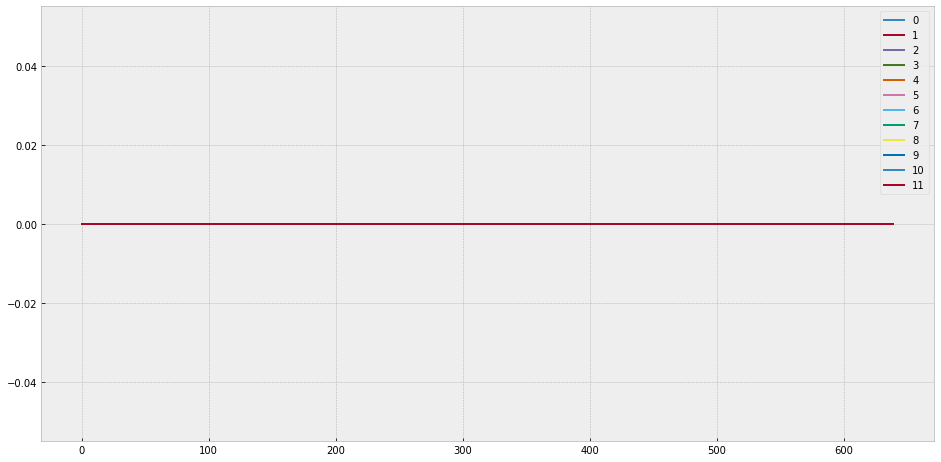

In [ ]:
pd.DataFrame(coef).plot()

In [ ]:
X.columns

Index(['D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis', 'infl', 'ltr',
       'corpr', 'svar'],
      dtype='object')

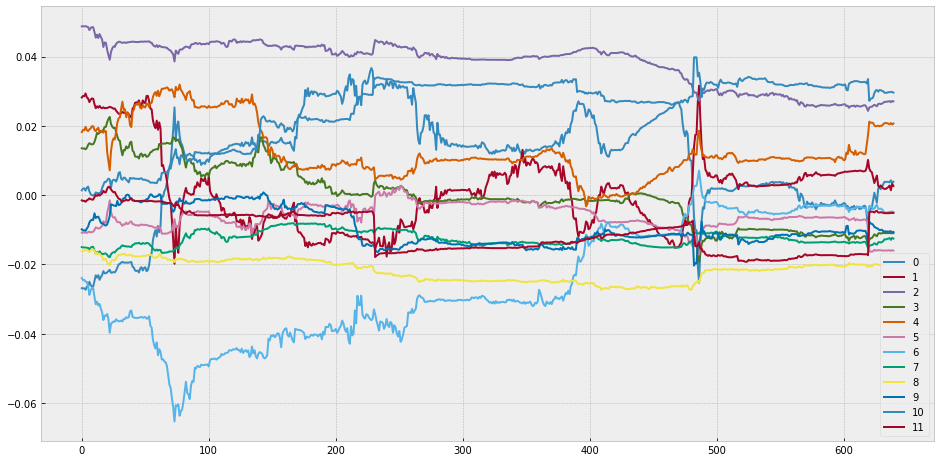

In [ ]:
pd.DataFrame(ridge_coef).plot()

We clearly see that the weights change over time, maybe there is some parameter instability.

In [ ]:
rec_ridge = pd.Series(ridge_forecast).rename('Ridge')
rec_lasso = pd.Series(lasso_forecast).rename('Lasso')

In [ ]:
actual=pd.Series(Y[500:]).rename('Actual').reset_index(drop=True)

In [ ]:
df=pd.concat([actual, rec_ridge,rec_lasso],axis=1)

In [ ]:
gw=pd.read_csv('GWdata.csv')
gw['yyyymm'] = pd.to_datetime(gw['yyyymm'],format='%Y%m', errors='coerce')
gw.set_index('yyyymm',inplace=True)

In [ ]:
df.set_index(gw[501:].index.copy(),inplace=True)

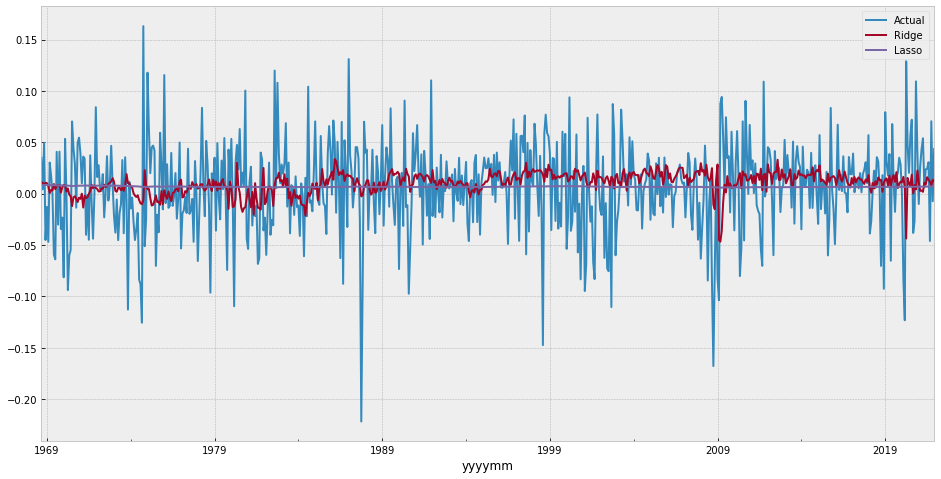

In [ ]:
df.plot()